## Self-Taught Learning

## Part -1

### Install required packages

In [1]:
## The following two commands remove any previously installed H2O packages for R.
if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }
if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }
pkgs <- c("RCurl","jsonlite")
### Next, download packages that H2O depends on.
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
}
## Download and install the H2O package for R.
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))
install.packages("BBmisc")

Removing package from 'C:/Users/mkha0052/AppData/Local/Continuum/anaconda3/envs/DAA/Lib/R/library'
(as 'lib' is unspecified)


package 'BBmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mkha0052\AppData\Local\Temp\RtmpwXi1VJ\downloaded_packages


## Load the required libraries

In [2]:
library(ggplot2)
library(BBmisc)
library(h2o)
options(warn=-1)
#If there is a proxy: proxy.old <- Sys.getenv('http_proxy'); Sys.setenv('http_proxy'='');
localH2O =  h2o.init(nthreads = -1, port = 54321, max_mem_size = '6G', startH2O = TRUE)
library(tidyr)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'BBmisc'

The following object is masked from 'package:base':

    isFALSE


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\mkha0052\AppData\Local\Temp\RtmpwXi1VJ/h2o_mkha0052_started_from_r.out
    C:\Users\mkha0052\AppData\Local\Temp\RtmpwXi1VJ/h2o_mkha0052_started_from_r.err


Starting H2O JVM and connecting:  Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 553 milliseconds 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.26.0.8 
    H2O cluster version age:    15 hours and 53 minutes  
    H2O cluster name:           H2O_started_from_R_mkha0052_quj245 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   5.33 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal

## Auxillary Functions

## Error Function

In [3]:
## Load the required datasets that is Task 2C_labeled.csv and Task2C_unlabeled.csv

labelled_train <- read.csv('Task2C_labeled.csv')
unlabelled_train <- read.csv('Task2C_unlabeled.csv')



In [4]:
head(labelled_train)  # a glimpse of the training data

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
head(unlabelled_train)  # a glimpse of the unlabelled data

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Drop NA's

**Since this is image data the data is in compressed format and there should be no loss of data, so we drop the NA's so as to keep the original information compressed, so the decoder can retain the original information from the compressed data and there is no loss of information and to remove noise.**

In [6]:
labelled_train<-labelled_train%>% drop_na
unlabelled_train<-unlabelled_train%>%drop_na

## Standardize the data

**We standardize the data so as to use the compressed data and pass it to the decoder to reconstruct the original information**

In [7]:
## factorize the labels of the labelled and unlabelled data so as to make it easier to train the models for
## reconstruction and classification using Neural Nets.


labelled_train$label <- as.factor(labelled_train$label)
unlabelled_train$label <- as.factor(unlabelled_train$label)


In [8]:
labelled_train <- normalize(labelled_train, method = "standardize", range = c(0, 1), margin = 2L)
unlabelled_train <- normalize(unlabelled_train, method = "standardize", range = c(0, 1), margin = 2L)


In [9]:
# Write the standardized and noise free documents to a separate version of the file.

write.csv(labelled_train, file = "Task2C_labeled_version_1.csv",row.names = FALSE)
write.csv(unlabelled_train, file = "Task2C_unlabeled_version_1.csv",row.names = FALSE)

`Create an error function to calculate the classification error which is the difference between the reconstructed data nd the original data`.

In [10]:
error.rate <- function(Y1, T1){
  if (nrow(Y1)!=nrow(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/nrow(T1))
    }

**Create an empty matrix to record the reconstruction error in the matrix and read/load the transformed dataset versions from the folder and import it using h20.**

In [11]:
reconstruction.train.error <- matrix(NA, nrow=25, ncol=2)

# Students: Use the "absolute" path to the datasets on your machine (important)
labeled.frame <- h2o.importFile(path = 'Task2C_labeled_version_1.csv' ,sep=',')
unlabeled.frame <- h2o.importFile(path = 'Task2C_unlabeled_version_1.csv' ,sep=',')
test.frame <- h2o.importFile(path = 'Task2C_test.csv' ,sep=',')

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


**Create a new train dataframe which is a complete dataframe for the unlabelled data and the labelled data without the labels in order to train the autoencoder**

In [12]:
labeled.frame[,1] <- as.factor(labeled.frame$label)
unlabeled.frame[,1] <- NA
train.frame <- h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1])
test.frame[,1] <- as.factor(test.frame$label)


## Part 2 and Part 3 - Train the Autoencoder

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

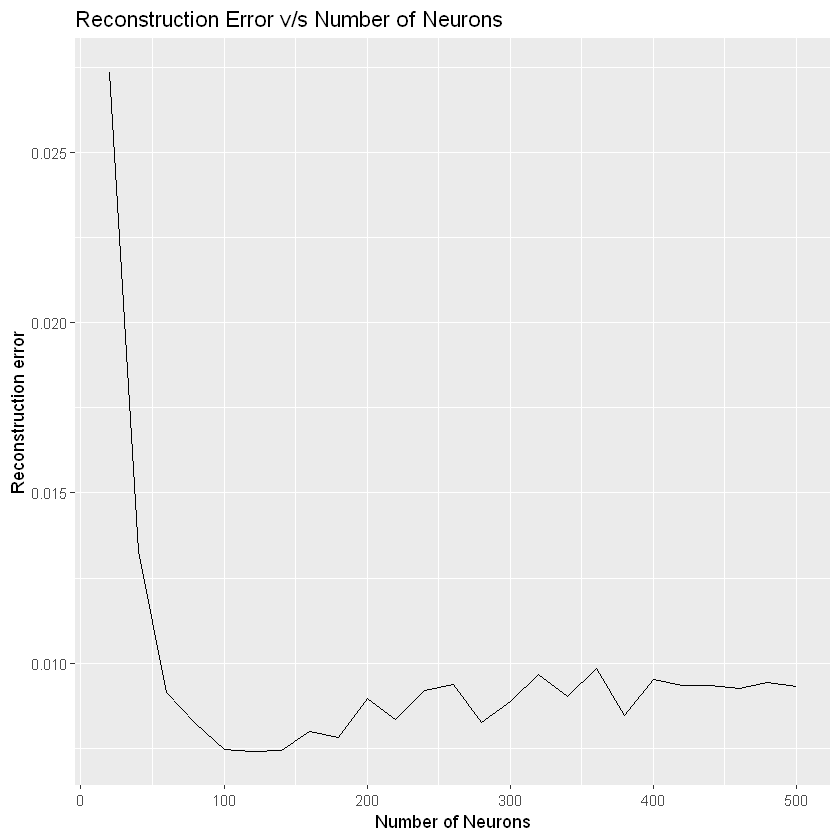

In [13]:
i <- 1

for (k in seq(20, 500, 20)){
  # build a neural network classifier based on the labeled training data
 
  NN.model_encoder <- h2o.deeplearning(    
    x = 2:ncol(train.frame), # select all pixels + extra features
    training_frame = train.frame, # specify the frame (imported file)    
    hidden = c(k), # number of layers and their units
    epochs = 50, # maximum number of epoches  
    activation = 'Tanh', # activation function
    autoencoder = TRUE, # is it an autoencoder? Yes!
    l2 = 0.1)
    reconstruction_error <- mean(h2o.anomaly(NN.model_encoder, train.frame))
    reconstruction.train.error[i, 1] <- k
    reconstruction.train.error[i, 2] <- reconstruction_error
    i=i+1
}

reconstruction.train.error <- data.frame(reconstruction.train.error)
ggplot(data=reconstruction.train.error,aes(x=X1,y=X2),color='red') + geom_line() + labs(x="Number of Neurons") + labs(y="Reconstruction error") + labs(title = "Reconstruction Error v/s Number of Neurons")


## Graph evaluation

## Part 4 - Build a 3 layer Neural Network with 100 units in the hidden layer


In [14]:
NN.model <- h2o.deeplearning(    
  x = 2:ncol(labeled.frame), # select all pixels + extra features
  y = 1,
  training_frame = labeled.frame, # specify the frame (imported file)    
  hidden = c(100), # number of layers and their units
  epochs = 50, # maximum number of epochs  
  activation = 'Tanh', # activation function
  autoencoder = FALSE, # is it an autoencoder? No!
  l2 = 0.1
)

  |======================================================================| 100%


In [15]:
pred_labels <- h2o.predict(NN.model, test.frame)$predict
error.rate(test.frame$label, pred_labels)

  |======================================================================| 100%


[1] 0.688

In [16]:
reconstruction.test.error <- matrix(NA, nrow=25, ncol=2)



In [17]:
classification_test.error <- matrix(NA, nrow=25, ncol=1)


for (k in seq(20, 500, 20)){

  ## Autoencoder  
  NN.model_encoder <- h2o.deeplearning(    
  x = 2:ncol(train.frame), # select all pixels + extra features
  training_frame = train.frame, # specify the frame (imported file)    
  hidden = c(k), # number of layers and their units
  epochs = 50, # maximum number of epoches  
  activation = 'Tanh', # activation function 
  autoencoder = TRUE, # is it an autoencoder? Yes!
  l2 = 0.1
)
  

  
  ## augmented dataframe with features of autoencoder and labelled data for NN
    ## h20.deepfeatures is used to access the middle hidden layer
  labeled.frame.extra <- h2o.cbind(labeled.frame,as.numeric(h2o.deepfeatures(NN.model_encoder,labeled.frame,layer=1)))  
  
  ## NN model for augmented labelled data set
     # select all pixels + extra features, here extra features being the neurons of the hidden layer
  NN.model_NN <- h2o.deeplearning(    
  x = 2:ncol(labeled.frame.extra),
  y = 1,
  training_frame = labeled.frame.extra, # specify the frame (imported file)    
  hidden = c(k), # number of layers and their units
  epochs = 50, # maximum number of epochs  
  activation = 'Tanh', # activation function 
  autoencoder = FALSE, # is it an autoencoder? No!
  l2 = 0.1
)
  
  #make test data predictions and calculate errors
  test_preds <- h2o.predict(NN.model_NN, test.frame)$predict
  classification_test.error[k/20] <-error.rate(test.frame$label,  test_preds)  
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

In [18]:
nrow(classification_test.error)

[1] 25

In [21]:
image_data <- data.frame('K'= seq(20,500,20),'Classification_Error'=classification_test.error)

In [22]:
image_data

K,Classification_Error
20,0.655
40,0.716
60,0.738
80,0.660
100,0.566
120,0.583
140,0.578
160,0.640
180,0.626
200,0.574


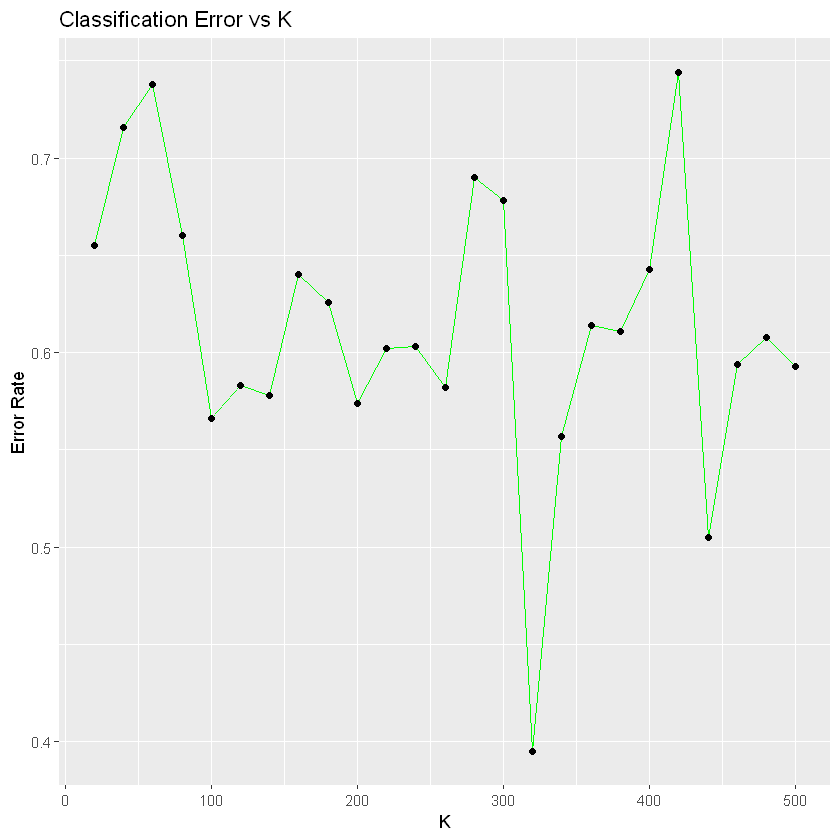

In [24]:
ggplot(data = image_data,aes(x=image_data[,1],y=image_data[,2])) + geom_line(color = 'green') + geom_point()+
    ggtitle('Classification Error vs K')+
    ylab('Error Rate')+ xlab('K')